<a href="https://colab.research.google.com/github/sankaliyamirali2005-tech/monk9teck_VLSI_INTERNSHIP_TASKS/blob/main/VLSI_ASIC_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LibreLane Colab


In [1]:
# @title Setup Nix {display-mode: "form"}
# @markdown <img src="https://raw.githubusercontent.com/NixOS/nixos-artwork/51a27e4a011e95cb559e37d32c44cf89b50f5154/logo/nix-snowflake-colours.svg" width="32"/>
# @markdown
# @markdown Nix is a package manager with an emphasis on reproducible builds,
# @markdown and it is the primary method for installing LibreLane.
# @markdown
# @markdown This step installs the Nix package manager and enables the
# @markdown FOSSi Foundation Nix Cache.
# @markdown
# @markdown If you're not in a Colab, this just sets the environment variables.
# @markdown You will need to install Nix and enable flakes on your own following
# @markdown [this guide](https://librelane.readthedocs.io/en/stable/getting_started/common/nix_installation/index.html).
import os
from pathlib import Path
import subprocess
import sys
import shutil
import tempfile

os.environ["LOCALE_ARCHIVE"] = "/usr/lib/locale/locale-archive"

if "google.colab" in sys.modules:
    if shutil.which("nix-env") is None:
        with tempfile.TemporaryDirectory() as d:
            d = Path(d)
            installer_path = d / "nix"
            !curl --proto '=https' --tlsv1.2 -sSf -L https://install.determinate.systems/nix > {installer_path}
            with subprocess.Popen(
                [
                    "bash",
                    installer_path,
                    "install",
                    "--prefer-upstream-nix",
                    "--no-confirm",
                    "--extra-conf",
                    "extra-substituters = https://nix-cache.fossi-foundation.org\nextra-trusted-public-keys = nix-cache.fossi-foundation.org:3+K59iFwXqKsL7BNu6Guy0v+uTlwsxYQxjspXzqLYQs=\n",
                ],
                stdout=subprocess.PIPE,
                stderr=subprocess.STDOUT,
                encoding="utf8",
            ) as p:
                for line in p.stdout:
                    print(line, end="")
else:
    if shutil.which("nix-env") is None:
        raise RuntimeError("Nix is not installed!")

os.environ["PATH"] = f"/nix/var/nix/profiles/default/bin/:{os.getenv('PATH')}"

info: downloading installer
 INFO nix-installer v3.15.2
 INFO Step: Create directory `/nix`
 INFO Step: Provision Nix
 INFO Step: Create build users (UID 30001-30032) and group (GID 30000)
 INFO Step: Configure Nix
 INFO Step: Create directory `/etc/tmpfiles.d`
 INFO Step: Configure upstream Nix daemon service
 INFO Step: Remove directory `/nix/temp-install-dir`
 WARN SelfTest([ShellFailed { shell: Sh, command: "\"sh\" \"-lc\" \"exec nix build --option substitute false --option post-build-hook \\'\\' --no-link --expr \\'derivation { name = \\\"self-test-sh-1770221085907\\\"; system = \\\"x86_64-linux\\\"; builder = \\\"/bin/sh\\\"; args = [\\\"-c\\\" \\\"echo hello > \\\\$out\\\"]; }\\'\"", output: Output { status: ExitStatus(unix_wait_status(256)), stdout: "", stderr: "error:\n       … while calling the 'derivationStrict' builtin\n         at «nix-internal»/derivation-internal.nix:37:12:\n           36|\n           37|   strict = derivationStrict drvAttrs;\n             |            ^

In [2]:
# @title Get LibreLane {display-mode: "form"}
# @markdown Click the ▷ button to download and install LibreLane.
# @markdown
# @markdown This will install LibreLane's tool dependencies using Nix,
# @markdown and LibreLane itself using PIP.
# @markdown
# @markdown Note that `python3-tk` may need to be installed using your OS's
# @markdown package manager.
import os
import subprocess
import IPython

librelane_version = "latest"  # @param {key:"LibreLane Version", type:"string"}

if librelane_version == "latest":
    librelane_version = "main"

pdk_root = "~/.ciel"  # @param {key:"PDK Root", type:"string"}

pdk_root = os.path.expanduser(pdk_root)

pdk = "sky130"  # @param {key:"PDK (without the variant)", type:"string"}

librelane_ipynb_path = os.path.join(os.getcwd(), "librelane_ipynb")

display(IPython.display.HTML("<h3>Downloading LibreLane…</a>"))


TESTING_LOCALLY = False
!rm -rf {librelane_ipynb_path}
!mkdir -p {librelane_ipynb_path}
if TESTING_LOCALLY:
    !ln -s {os.getcwd()} {librelane_ipynb_path}
else:
    !curl -L "https://github.com/librelane/librelane/tarball/{librelane_version}" | tar -xzC {librelane_ipynb_path} --strip-components 1

try:
    import tkinter
except ImportError:
    if "google.colab" in sys.modules:
        !sudo apt-get install python-tk

try:
    import tkinter
except ImportError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to import the <code>tkinter</code> library for Python, which is required to load PDK configuration values. Make sure <code>python3-tk</code> or equivalent is installed on your system.</a>'
        )
    )
    raise e from None


display(IPython.display.HTML("<h3>Downloading LibreLane's dependencies…</a>"))
try:
    with subprocess.Popen(
        [
            "nix",
            "profile",
            "install",
            ".#colab-env",
        ],
        cwd=librelane_ipynb_path,
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        encoding="utf8",
    ) as p:
        for line in p.stdout:
            print(line, end="")
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install binary dependencies using Nix…</h3>'
        )
    )

display(IPython.display.HTML("<h3>Downloading Python dependencies using PIP…</a>"))
try:
    subprocess.check_call(
        ["pip3", "install", "."],
        cwd=librelane_ipynb_path,
    )
except subprocess.CalledProcessError as e:
    display(
        IPython.display.HTML(
            '<h3 style="color: #800020";>❌ Failed to install Python dependencies using PIP…</h3>'
        )
    )
    raise e from None

display(IPython.display.HTML("<h3>Downloading PDK…</a>"))
import ciel
from ciel.source import StaticWebDataSource

ciel.enable(
    ciel.get_ciel_home(pdk_root),
    pdk,
    open(
        os.path.join(librelane_ipynb_path, "librelane", "open_pdks_rev"),
        encoding="utf8",
    )
    .read()
    .strip(),
    data_source=StaticWebDataSource("https://fossi-foundation.github.io/ciel-releases"),
)

sys.path.insert(0, librelane_ipynb_path)
display(IPython.display.HTML("<h3>⭕️ Done.</a>"))

import logging

# Remove the stupid default colab logging handler
logging.getLogger().handlers.clear()


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 9487k    0 9487k    0     0  7779k      0 --:--:--  0:00:01 --:--:-- 32.2M


unpacking 'github:fossi-foundation/nix-eda/f8fb90fb348f04d021ca773f268c6e15a24ae11f?narHash=sha256-IyEhOQOtSoYOO0xdbYeoxOufBUdt7yDrYlJpQgVon8I%3D' into the Git cache...
copying path '/nix/store/i1aw9jjgxcvyd642s12kw3iasmarwd42-source' from 'https://cache.nixos.org'...
unpacking 'github:numtide/devshell/7c9e793ebe66bcba8292989a68c0419b737a22a0?narHash=sha256-kWNaq6wQUbUMlPgw8Y%2B9/9wP0F8SHkjy24/mN3UAppg%3D' into the Git cache...
unpacking 'github:fossi-foundation/ciel/f4990f916c29f1cb7d890ab5b0716f63ce9de1b4?narHash=sha256-QoaS950TbRvvtndqHf8yz9VrQOZoTJCTPl4wWHgpRDM%3D' into the Git cache...
this derivation will be built:
  /nix/store/wxd6wah477mx6xhnmgkj7l52ddhf13lm-librelane-colab-env.drv
these 370 paths will be fetched (883.7 MiB download, 4.5 GiB unpacked):
  /nix/store/wmwgqi3w2q5gk1nl6pjqkhblqnh9gq8r-abseil-cpp-20210324.2
  /nix/store/hx8k94a5jddw4f5ipbk444v2rlp1dhsp-abseil-cpp-20220623.2
  /nix/store/ha7gbcgbp9bv4hmll7ghy7kqrcpyjlka-abseil-cpp-20240116.2
  /nix/store/mjgi65m3hgzq

Version 0fe599b2afb6708d281543108caf8310912f54af not found locally, attempting to download…

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Output()

Version 0fe599b2afb6708d281543108caf8310912f54af enabled for the sky130 PDK.

In [3]:
import librelane

print(librelane.__version__)

2.4.12


# Creating the design


In [4]:
%%writefile spm.v
module spm(clk, rst, x, y, p);
    parameter size = 32;
    input clk, rst;
    input y;
    input[size-1:0] x;
    output p;

    wire[size-1:1] pp;
    wire[size-1:0] xy;

    genvar i;

    CSADD csa0 (.clk(clk), .rst(rst), .x(x[0]&y), .y(pp[1]), .sum(p));
    generate for(i=1; i<size-1; i=i+1) begin
        CSADD csa (.clk(clk), .rst(rst), .x(x[i]&y), .y(pp[i+1]), .sum(pp[i]));
    end endgenerate
    TCMP tcmp (.clk(clk), .rst(rst), .a(x[size-1]&y), .s(pp[size-1]));

endmodule

module TCMP(clk, rst, a, s);
    input clk, rst;
    input a;
    output reg s;

    reg z;

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            //Reset logic goes here.
            s <= 1'b0;
            z <= 1'b0;
        end
        else begin
            //Sequential logic goes here.
            z <= a | z;
            s <= a ^ z;
        end
    end
endmodule

module CSADD(clk, rst, x, y, sum);
    input clk, rst;
    input x, y;
    output reg sum;

    reg sc;

    // Half Adders logic
    wire hsum1, hco1;
    assign hsum1 = y ^ sc;
    assign hco1 = y & sc;

    wire hsum2, hco2;
    assign hsum2 = x ^ hsum1;
    assign hco2 = x & hsum1;

    always @(posedge clk or posedge rst) begin
        if (rst) begin
            //Reset logic goes here.
            sum <= 1'b0;
            sc <= 1'b0;
        end
        else begin
            //Sequential logic goes here.
            sum <= hsum2;
            sc <= hco1 ^ hco2;
        end
    end
endmodule

Writing spm.v


## Setting up the configuration


In [5]:
from librelane.config import Config

Config.interactive(
    "spm",
    PDK="sky130A",
    CLOCK_PORT="clk",
    CLOCK_NET="clk",
    CLOCK_PERIOD=10,
    PRIMARY_GDSII_STREAMOUT_TOOL="klayout",
)


### Interactive Configuration
#### Initial Values

<br />

```yaml
CELL_BB_VERILOG_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox.v
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd__blackbox_pp.v
CELL_GDS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/gds/sky130_fd_sc_hd.gds
CELL_LEFS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef
CELL_PAD_EXCLUDE:
- sky130_fd_sc_hd__tap*
- sky130_fd_sc_hd__decap*
- sky130_ef_sc_hd__decap*
- sky130_fd_sc_hd__fill*
CELL_SPICE_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__decap_12.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_12.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_4.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_ef_sc_hd__fill_8.spice
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/spice/sky130_fd_sc_hd.spice
CELL_VERILOG_MODELS:
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/primitives.v
- /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/verilog/sky130_fd_sc_hd.v
CLOCK_NET: clk
CLOCK_PERIOD: 10
CLOCK_PORT: clk
CLOCK_TRANSITION_CONSTRAINT: 0.15
CLOCK_UNCERTAINTY_CONSTRAINT: 0.25
CLOCK_WIRE_RC_LAYERS: null
DECAP_CELL:
- sky130_ef_sc_hd__decap_12
- sky130_fd_sc_hd__decap_8
- sky130_fd_sc_hd__decap_6
- sky130_fd_sc_hd__decap_4
- sky130_fd_sc_hd__decap_3
DEFAULT_CORNER: nom_tt_025C_1v80
DEFAULT_MAX_TRAN: null
DESIGN_DIR: .
DESIGN_NAME: spm
DIE_AREA: null
DIODE_CELL: sky130_fd_sc_hd__diode_2/DIODE
ENDCAP_CELL: sky130_fd_sc_hd__decap_3
EXTRA_EXCLUDED_CELLS: null
EXTRA_GDS_FILES: null
EXTRA_LEFS: null
EXTRA_LIBS: null
EXTRA_SPICE_MODELS: null
EXTRA_VERILOG_MODELS: null
FALLBACK_SDC_FILE: /content/librelane_ipynb/librelane/scripts/base.sdc
FILL_CELL:
- sky130_fd_sc_hd__fill*
FP_IO_HLAYER: met3
FP_IO_VLAYER: met2
FP_TAPCELL_DIST: 13
FP_TRACKS_INFO: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tracks.info
GND_NETS: null
GND_PIN: VGND
GPIO_PADS_LEF:
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/lef/sky130_fd_io.lef
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/lef/sky130_ef_io.lef
GPIO_PADS_LEF_CORE_SIDE:
- /root/.ciel/sky130A/libs.tech/openlane/custom_cells/lef/sky130_fd_io_core.lef
- /root/.ciel/sky130A/libs.tech/openlane/custom_cells/lef/sky130_ef_io_core.lef
GPIO_PADS_VERILOG:
- /root/.ciel/sky130A/libs.ref/sky130_fd_io/verilog/sky130_ef_io.v
GPIO_PAD_CELLS:
- sky130_fd_io*
- sky130_ef_io*
IO_DELAY_CONSTRAINT: 20
LIB:
  '*_ff_n40C_1v95':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ff_n40C_1v95.lib
  '*_ss_100C_1v60':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__ss_100C_1v60.lib
  '*_tt_025C_1v80':
  - /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib
MACROS: null
MAX_CAPACITANCE_CONSTRAINT: 0.2
MAX_FANOUT_CONSTRAINT: 10
MAX_TRANSITION_CONSTRAINT: 0.75
OUTPUT_CAP_LOAD: 33.442
PDK: sky130A
PDK_ROOT: /root/.ciel
PLACE_SITE: unithd
PNR_EXCLUDED_CELL_FILE: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/drc_exclude.cells
PRIMARY_GDSII_STREAMOUT_TOOL: klayout
RT_MAX_LAYER: met5
RT_MIN_LAYER: met1
SCL_GROUND_PINS:
- VGND
- VNB
SCL_POWER_PINS:
- VPWR
- VPB
SIGNAL_WIRE_RC_LAYERS: null
STA_CORNERS:
- nom_tt_025C_1v80
- nom_ss_100C_1v60
- nom_ff_n40C_1v95
- min_tt_025C_1v80
- min_ss_100C_1v60
- min_ff_n40C_1v95
- max_tt_025C_1v80
- max_ss_100C_1v60
- max_ff_n40C_1v95
STD_CELL_LIBRARY: sky130_fd_sc_hd
SYNTH_BUFFER_CELL: sky130_fd_sc_hd__buf_2/A/X
SYNTH_CLK_DRIVING_CELL: null
SYNTH_DRIVING_CELL: sky130_fd_sc_hd__inv_2/Y
SYNTH_EXCLUDED_CELL_FILE: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/no_synth.cells
SYNTH_TIEHI_CELL: sky130_fd_sc_hd__conb_1/HI
SYNTH_TIELO_CELL: sky130_fd_sc_hd__conb_1/LO
TECH_LEFS:
  max_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__max.tlef
  min_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__min.tlef
  nom_*: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef
TIME_DERATING_CONSTRAINT: 5
TRISTATE_CELLS:
- sky130_fd_sc_hd__ebuf*
VDD_NETS: null
VDD_PIN: VPWR
VDD_PIN_VOLTAGE: 1.8
WELLTAP_CELL: sky130_fd_sc_hd__tapvpwrvgnd_1
WIRE_LENGTH_THRESHOLD: null
meta:
  flow: null
  librelane_version: 2.4.12
  step: null
  substituting_steps: null
  version: 1

```


# Running implementation steps


In [6]:
from librelane.steps import Step

In [7]:
Synthesis = Step.factory.get("Yosys.Synthesis")

Synthesis.display_help()



### Synthesis

```{eval-rst}

Performs synthesis and technology mapping on Verilog RTL files
using Yosys and ABC, emitting a netlist.

Some metrics will also be extracted and updated, namely:

* ``design__instance__count``
* ``design__instance_unmapped__count``
* ``design__instance__area``

Note that Yosys steps do not currently support gzipped standard cell dotlib
files. They are however supported for macros:

https://github.com/YosysHQ/yosys/issues/4830

```

#### Importing
```python
from librelane.steps.pyosys import Synthesis

# or

from librelane.steps import Step

Synthesis = Step.factory.get("Yosys.Synthesis")
```


#### Inputs and Outputs

| Inputs | Outputs |
| - | - |
|  | Verilog Netlist (.nl.v) |


#### Configuration Variables

| Variable Name | Type | Description | Default | 
| - | - | - | - | 
| `SYNTH_LATCH_MAP` <sup>PDK</sup> | Path? | A path to a file containing the latch mapping for Yosys. | `None` |
| `SYNTH_TRISTATE_MAP` <sup>PDK</sup> | Path? | A path to a file containing the tri-state buffer mapping for Yosys. | `None` |
| `SYNTH_CSA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the carry-select adder mapping for Yosys. | `None` |
| `SYNTH_RCA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the ripple-carry adder mapping for Yosys. | `None` |
| `SYNTH_FA_MAP` <sup>PDK</sup> | Path? | A path to a file containing the full adder mapping for Yosys. | `None` |
| `SYNTH_MUX_MAP` <sup>PDK</sup> | Path? | A path to a file containing the mux mapping for Yosys. | `None` |
| `SYNTH_MUX4_MAP` <sup>PDK</sup> | Path? | A path to a file containing the mux4 mapping for Yosys. | `None` |
| `USE_LIGHTER`  | bool | Activates Lighter, an experimental plugin that attempts to optimize clock-gated flip-flops. | `False` |
| `LIGHTER_DFF_MAP`  | Path? | An override to the custom DFF map file provided for the given SCL by Lighter. | `None` |
| `YOSYS_LOG_LEVEL`  | 'ALL'｜<br />'WARNING'｜<br />'ERROR' | Which log level for Yosys. At WARNING or higher, the initialization splash is also disabled. | `ALL` |
| `SYNTH_CHECKS_ALLOW_TRISTATE`  | bool | Ignore multiple-driver warnings if they are connected to tri-state buffers on a best-effort basis. | `True` |
| `SYNTH_AUTONAME`  | bool | Generates names for netlist instances. This results in instance names that can be extremely long, but are more human-readable. | `False` |
| `SYNTH_STRATEGY`  | 'AREA 0'｜<br />'AREA 1'｜<br />'AREA 2'｜<br />'AREA 3'｜<br />'DELAY 0'｜<br />'DELAY 1'｜<br />'DELAY 2'｜<br />'DELAY 3'｜<br />'DELAY 4' | Strategies for abc logic synthesis and technology mapping. AREA strategies usually result in a more compact design, while DELAY strategies usually result in a design that runs at a higher frequency. Please note that there is no way to know which strategy is the best before trying them. | `AREA 0` |
| `SYNTH_ABC_BUFFERING`  | bool | Enables `abc` cell buffering. | `False` |
| `SYNTH_ABC_LEGACY_REFACTOR`  | bool | Replaces the ABC command `drf -l` with `refactor` which matches older versions of LibreLane but is more unstable. | `False` |
| `SYNTH_ABC_LEGACY_REWRITE`  | bool | Replaces the ABC command `drw -l` with `rewrite` which matches older versions of LibreLane but is more unstable. | `False` |
| `SYNTH_ABC_DFF`  | bool | Passes D-flipflop cells through ABC for optimization (which can for example, eliminate identical flip-flops). | `False` |
| `SYNTH_ABC_USE_MFS3`  | bool | Experimental: attempts a SAT-based remapping in all area and delay strategies before 'retime', which may improve PPA results. | `False` |
| `SYNTH_ABC_AREA_USE_NF`  | bool | Experimental: uses the &nf delay-based mapper with a very high value instead of the amap area mapper, which may be better in some scenarios at recovering area. | `False` |
| `SYNTH_DIRECT_WIRE_BUFFERING`  | bool | Enables inserting buffer cells for directly connected wires. | `True` |
| `SYNTH_SPLITNETS`  | bool | Splits multi-bit nets into single-bit nets. Easier to trace but may not be supported by all tools. | `True` |
| `SYNTH_SIZING`  | bool | Enables `abc` cell sizing (instead of buffering). | `False` |
| `SYNTH_HIERARCHY_MODE`  | 'flatten'｜<br />'deferred_flatten'｜<br />'keep' | Affects how hierarchy is maintained throughout and after synthesis. 'flatten' flattens it during and after synthesis. 'deferred_flatten' flattens it after synthesis. 'keep' never flattens it. | `flatten` |
| `SYNTH_SHARE_RESOURCES`  | bool | A flag that enables yosys to reduce the number of cells by determining shareable resources and merging them. | `True` |
| `SYNTH_ADDER_TYPE`  | 'YOSYS'｜<br />'FA'｜<br />'RCA'｜<br />'CSA' | Adder type to which the $add and $sub operators are mapped to.  Possible values are `YOSYS/FA/RCA/CSA`; where `YOSYS` refers to using Yosys internal adder definition, `FA` refers to full-adder structure, `RCA` refers to ripple carry adder structure, and `CSA` refers to carry select adder. | `YOSYS` |
| `SYNTH_EXTRA_MAPPING_FILE`  | Path? | Points to an extra techmap file for yosys that runs right after yosys `synth` before generic techmap. | `None` |
| `SYNTH_ELABORATE_ONLY`  | bool | "Elaborate" the design only without attempting any logic mapping. Useful when dealing with structural Verilog netlists. | `False` |
| `SYNTH_ELABORATE_FLATTEN`  | bool | If `SYNTH_ELABORATE_ONLY` is specified, this variable controls whether or not the top level should be flattened. | `True` |
| `SYNTH_MUL_BOOTH`  | bool | Runs the booth pass as part of synthesis: See https://yosyshq.readthedocs.io/projects/yosys/en/latest/cmd/booth.html | `False` |
| `SYNTH_TIE_UNDEFINED`  | 'high'｜<br />'low' | Whether to tie undefined values low or high. Explicitly provide null if you wish to simply leave them undriven. | `low` |
| `SYNTH_WRITE_NOATTR`  | bool | If true, Verilog-2001 attributes are omitted from output netlists. Some utilities do not support attributes. | `True` |
| `VERILOG_FILES`  | List[Path] | The paths of the design's Verilog files. | `None` |
| `VERILOG_DEFINES`  | List[str]? | Preprocessor defines for input Verilog files. | `None` |
| `VERILOG_POWER_DEFINE`  | str? | Specifies the name of the define used to guard power and ground connections in the input RTL. | `USE_POWER_PINS` |
| `VERILOG_INCLUDE_DIRS`  | List[Path]? | Specifies the Verilog `include` directories. | `None` |
| `SYNTH_PARAMETERS`  | List[str]? | Key-value pairs to be `chparam`ed in Yosys, in the format `key1=value1`. | `None` |
| `USE_SYNLIG`  | bool | Use the Synlig plugin to process files, which has better SystemVerilog parsing capabilities but may not be compatible with all Yosys commands and attributes. | `False` |
| `SYNLIG_DEFER`  | bool | Uses -defer flag when reading files the Synlig plugin, which may improve performance by reading each file separately, but is experimental. | `False` |



# Synthesis


In [8]:
from librelane.state import State

synthesis = Synthesis(
    VERILOG_FILES=["./spm.v"],
    state_in=State(),
)
synthesis.start()

──────────────────────────────────────────────────── Synthesis ────────────────────────────────────────────────────

[16:12:47] VERBOSE  Running 'Yosys.Synthesis' at 'librelane_run/1-yosys-synthesis'…                    ]8;id=195959;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=55885;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[16:12:47] VERBOSE  Logging subprocess to 'librelane_run/1-yosys-synthesis/yosys-synthesis.log'…       ]8;id=652494;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=20936;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

/----------------------------------------------------------------------------\

|  yosys -- Yosys Open SYnthesis Suite                                       |

|  Copyright (C) 2012 - 2024  Claire Xenia Wolf <claire@yosyshq.com>         |

|  Distributed under an ISC-like license, type "license" to see terms        |

\----------------------------------------------------------------------------/

Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)

Loaded SDC plugin

1. Executing Liberty frontend: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib

Imported 428 cell types from liberty file.

[INFO] Using SDC file '/content/librelane_run/1-yosys-synthesis/synthesis.abc.sdc' for ABC…

2. Executing Verilog-2005 frontend: ./spm.v

Parsing SystemVerilog input from `./spm.v' to AST representation.

Storing AST representation for module `$abstract\spm'.

Storing AST representation for module `$abstract\TCMP'.

Storing AST representation for module `$abstract\CSADD'.

Successfully finished Verilog frontend.

3. Executing HIERARCHY pass (managing design hierarchy).

4. Executing AST frontend in derive mode using pre-parsed AST for module `\spm'.

Generating RTLIL representation for module `\spm'.

4.1. Analyzing design hierarchy..

Top module:  \spm

4.2. Executing AST frontend in derive mode using pre-parsed AST for module `\CSADD'.

Generating RTLIL representation for module `\CSADD'.

4.3. Executing AST frontend in derive mode using pre-parsed AST for module `\TCMP'.

Generating RTLIL representation for module `\TCMP'.

4.4. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

4.5. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

Removing unused module `$abstract\CSADD'.

Removing unused module `$abstract\TCMP'.

Removing unused module `$abstract\spm'.

Removed 3 unused modules.

Renaming module spm to spm.

5. Generating Graphviz representation of design.

Writing dot description to `/content/librelane_run/1-yosys-synthesis/hierarchy.dot'.

Dumping module spm to page 1.

6. Executing TRIBUF pass.

7. Executing HIERARCHY pass (managing design hierarchy).

7.1. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

7.2. Analyzing design hierarchy..

Top module:  \spm

Used module:     \CSADD

Used module:     \TCMP

Removed 0 unused modules.

8. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Cleaned up 0 empty switches.

9. Executing PROC_RMDEAD pass (remove dead branches from decision trees).

Marked 1 switch rules as full_case in process $proc$./spm.v:58$37 in module CSADD.

Marked 1 switch rules as full_case in process $proc$./spm.v:28$39 in module TCMP.

Removed a total of 0 dead cases.

10. Executing PROC_PRUNE pass (remove redundant assignments in processes).

Removed 4 redundant assignments.

Promoted 0 assignments to connections.

11. Executing PROC_INIT pass (extract init attributes).

12. Executing PROC_ARST pass (detect async resets in processes).

Found async reset \rst in `\CSADD.$proc$./spm.v:58$37'.

Found async reset \rst in `\TCMP.$proc$./spm.v:28$39'.

13. Executing PROC_ROM pass (convert switches to ROMs).

Converted 0 switches.

14. Executing PROC_MUX pass (convert decision trees to multiplexers).

Creating decoders for process `\CSADD.$proc$./spm.v:58$37'.

1/2: $0\sc[0:0]

2/2: $0\sum[0:0]

Creating decoders for process `\TCMP.$proc$./spm.v:28$39'.

1/2: $0\s[0:0]

2/2: $0\z[0:0]

15. Executing PROC_DLATCH pass (convert process syncs to latches).

16. Executing PROC_DFF pass (convert process syncs to FFs).

Creating register for signal `\CSADD.\sum' using process `\CSADD.$proc$./spm.v:58$37'.

created $adff cell `$procdff$44' with positive edge clock and positive level reset.

Creating register for signal `\CSADD.\sc' using process `\CSADD.$proc$./spm.v:58$37'.

created $adff cell `$procdff$47' with positive edge clock and positive level reset.

Creating register for signal `\TCMP.\s' using process `\TCMP.$proc$./spm.v:28$39'.

created $adff cell `$procdff$50' with positive edge clock and positive level reset.

Creating register for signal `\TCMP.\z' using process `\TCMP.$proc$./spm.v:28$39'.

created $adff cell `$procdff$53' with positive edge clock and positive level reset.

17. Executing PROC_MEMWR pass (convert process memory writes to cells).

18. Executing PROC_CLEAN pass (remove empty switches from decision trees).

Removing empty process `CSADD.$proc$./spm.v:58$37'.

Removing empty process `TCMP.$proc$./spm.v:28$39'.

Cleaned up 0 empty switches.

19. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Checking module CSADD...

Checking module TCMP...

Found and reported 0 problems.

20. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

Optimizing module CSADD.

<suppressed ~2 debug messages>

Optimizing module TCMP.

<suppressed ~2 debug messages>

21. Executing FLATTEN pass (flatten design).

Deleting now unused module CSADD.

Deleting now unused module TCMP.

<suppressed ~32 debug messages>

22. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

23. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 285 unused wires.

<suppressed ~2 debug messages>

24. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

25. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

26. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

27. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

28. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

29. Executing OPT_DFF pass (perform DFF optimizations).

30. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

31. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

32. Executing FSM pass (extract and optimize FSM).

32.1. Executing FSM_DETECT pass (finding FSMs in design).

32.2. Executing FSM_EXTRACT pass (extracting FSM from design).

32.3. Executing FSM_OPT pass (simple optimizations of FSMs).

32.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

32.5. Executing FSM_OPT pass (simple optimizations of FSMs).

32.6. Executing FSM_RECODE pass (re-assigning FSM state encoding).

32.7. Executing FSM_INFO pass (dumping all available information on FSM cells).

32.8. Executing FSM_MAP pass (mapping FSMs to basic logic).

33. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

34. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

35. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

36. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

37. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

38. Executing OPT_DFF pass (perform DFF optimizations).

39. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

40. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

41. Executing WREDUCE pass (reducing word size of cells).

42. Executing PEEPOPT pass (run peephole optimizers).

43. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

44. Executing ALUMACC pass (create $alu and $macc cells).

Extracting $alu and $macc cells in module spm:

created 0 $alu and 0 $macc cells.

45. Executing SHARE pass (SAT-based resource sharing).

46. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

47. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

48. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

49. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

50. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

51. Executing OPT_DFF pass (perform DFF optimizations).

52. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

53. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

54. Executing MEMORY pass.

54.1. Executing OPT_MEM pass (optimize memories).

Performed a total of 0 transformations.

54.2. Executing OPT_MEM_PRIORITY pass (removing unnecessary memory write priority relations).

Performed a total of 0 transformations.

54.3. Executing OPT_MEM_FEEDBACK pass (finding memory read-to-write feedback paths).

54.4. Executing MEMORY_BMUX2ROM pass (converting muxes to ROMs).

54.5. Executing MEMORY_DFF pass (merging $dff cells to $memrd).

54.6. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

54.7. Executing MEMORY_SHARE pass (consolidating $memrd/$memwr cells).

54.8. Executing OPT_MEM_WIDEN pass (optimize memories where all ports are wide).

Performed a total of 0 transformations.

54.9. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

54.10. Executing MEMORY_COLLECT pass (generating $mem cells).

55. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

56. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

57. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

58. Executing OPT_DFF pass (perform DFF optimizations).

59. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

60. Executing MEMORY_MAP pass (converting memories to logic and flip-flops).

61. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

62. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

63. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

64. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

65. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

66. Executing OPT_SHARE pass.

67. Executing OPT_DFF pass (perform DFF optimizations).

68. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

69. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

70. Executing TECHMAP pass (map to technology primitives).

70.1. Executing Verilog-2005 frontend:                                                                             
/nix/store/9r0bh7sp051dpm8km8bqlb028anpd3v3-yosys/bin/../share/yosys/techmap.v

Parsing Verilog input from `/nix/store/9r0bh7sp051dpm8km8bqlb028anpd3v3-yosys/bin/../share/yosys/techmap.v' to AST 
representation.

Generating RTLIL representation for module `\_90_simplemap_bool_ops'.

Generating RTLIL representation for module `\_90_simplemap_reduce_ops'.

Generating RTLIL representation for module `\_90_simplemap_logic_ops'.

Generating RTLIL representation for module `\_90_simplemap_compare_ops'.

Generating RTLIL representation for module `\_90_simplemap_various'.

Generating RTLIL representation for module `\_90_simplemap_registers'.

Generating RTLIL representation for module `\_90_shift_ops_shr_shl_sshl_sshr'.

Generating RTLIL representation for module `\_90_shift_shiftx'.

Generating RTLIL representation for module `\_90_fa'.

Generating RTLIL representation for module `\_90_lcu_brent_kung'.

Generating RTLIL representation for module `\_90_alu'.

Generating RTLIL representation for module `\_90_macc'.

Generating RTLIL representation for module `\_90_alumacc'.

Generating RTLIL representation for module `\$__div_mod_u'.

Generating RTLIL representation for module `\$__div_mod_trunc'.

Generating RTLIL representation for module `\_90_div'.

Generating RTLIL representation for module `\_90_mod'.

Generating RTLIL representation for module `\$__div_mod_floor'.

Generating RTLIL representation for module `\_90_divfloor'.

Generating RTLIL representation for module `\_90_modfloor'.

Generating RTLIL representation for module `\_90_pow'.

Generating RTLIL representation for module `\_90_pmux'.

Generating RTLIL representation for module `\_90_demux'.

Generating RTLIL representation for module `\_90_lut'.

Successfully finished Verilog frontend.

70.2. Continuing TECHMAP pass.

Using extmapper simplemap for cells of type $and.

Using extmapper simplemap for cells of type $adff.

Using extmapper simplemap for cells of type $xor.

Using extmapper simplemap for cells of type $or.

No more expansions possible.

<suppressed ~326 debug messages>

71. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

72. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

73. Executing OPT_DFF pass (perform DFF optimizations).

74. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

75. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

76. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

77. Executing OPT_DFF pass (perform DFF optimizations).

78. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

79. Executing ABC pass (technology mapping using ABC).

79.1. Extracting gate netlist of module `\spm' to `<abc-temp-dir>/input.blif'..

Extracted 189 gates and 285 wires to a netlist network with 96 inputs and 64 outputs.

79.1.1. Executing ABC.

Running ABC command: "/nix/store/6l3aj1gi4lja8z5s4lan2k2cfz9mqkrz-yosys-abc/bin/abc" -s -f                         
<abc-temp-dir>/abc.script 2>&1

ABC: ABC command line: "source <abc-temp-dir>/abc.script".

ABC:

ABC: + read_blif <abc-temp-dir>/input.blif

ABC: + read_library <abc-temp-dir>/stdcells.genlib

ABC: Entered genlib library with 13 gates from file "<abc-temp-dir>/stdcells.genlib".

ABC: + strash

ABC: + dretime

ABC: + map

ABC: + write_blif <abc-temp-dir>/output.blif

79.1.2. Re-integrating ABC results.

ABC RESULTS:                OR cells:        1

ABC RESULTS:               AND cells:       32

ABC RESULTS:              NAND cells:       31

ABC RESULTS:              XNOR cells:       31

ABC RESULTS:               NOR cells:       31

ABC RESULTS:               XOR cells:       63

ABC RESULTS:        internal signals:      125

ABC RESULTS:           input signals:       96

ABC RESULTS:          output signals:       64

Removing temp directory.

80. Executing OPT pass (performing simple optimizations).

80.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

80.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

80.3. Executing OPT_DFF pass (perform DFF optimizations).

80.4. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 285 unused wires.

<suppressed ~126 debug messages>

80.5. Finished fast OPT passes.

81. Executing HIERARCHY pass (managing design hierarchy).

81.1. Analyzing design hierarchy..

Top module:  \spm

81.2. Analyzing design hierarchy..

Top module:  \spm

Removed 0 unused modules.

82. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Found and reported 0 problems.

83. Printing statistics.

=== spm ===

Number of wires:                354

Number of wire bits:            415

Number of public wires:         196

Number of public wire bits:     257

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                285

$_AND_                         32

$_DFF_PP0_                     64

$_NAND_                        31

$_NOR_                         31

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

$scopeinfo                     32

84. Generating Graphviz representation of design.

Writing dot description to `/content/librelane_run/1-yosys-synthesis/primitive_techmap.dot'.

Dumping module spm to page 1.

85. Executing OPT pass (performing simple optimizations).

85.1. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

85.2. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

85.3. Executing OPT_MUXTREE pass (detect dead branches in mux trees).

Running muxtree optimizer on module \spm..

Creating internal representation of mux trees.

No muxes found in this module.

Removed 0 multiplexer ports.

85.4. Executing OPT_REDUCE pass (consolidate $*mux and $reduce_* inputs).

Optimizing cells in module \spm.

Performed a total of 0 changes.

85.5. Executing OPT_MERGE pass (detect identical cells).

Finding identical cells in module `\spm'.

Removed a total of 0 cells.

85.6. Executing OPT_DFF pass (perform DFF optimizations).

85.7. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

85.8. Executing OPT_EXPR pass (perform const folding).

Optimizing module spm.

85.9. Finished OPT passes. (There is nothing left to do.)

86. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 32 unused cells and 97 unused wires.

<suppressed ~129 debug messages>

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/9249ad52f838424a89eb037621120b52.lib ",

"modules": {

"\\spm": {

"num_wires":         257,

"num_wire_bits":     288,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         253,

"num_cells_by_type": {

"$_AND_": 32,

"$_DFF_PP0_": 64,

"$_NAND_": 31,

"$_NOR_": 31,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63

}

}

},

"design": {

"num_wires":         257,

"num_wire_bits":     288,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         253,

"num_cells_by_type": {

"$_AND_": 32,

"$_DFF_PP0_": 64,

"$_NAND_": 31,

"$_NOR_": 31,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63

}

}

}

87. Printing statistics.

=== spm ===

Number of wires:                257

Number of wire bits:            288

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                253

$_AND_                         32

$_DFF_PP0_                     64

$_NAND_                        31

$_NOR_                         31

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Area for cell type $_DFF_PP0_ is unknown!

[INFO] Applying tri-state buffer mapping from                                                                      
'/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v'…

88. Executing TECHMAP pass (map to technology primitives).

88.1. Executing Verilog-2005 frontend: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v

Parsing Verilog input from `/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/tribuff_map.v' to AST           
representation.

Generating RTLIL representation for module `\$_TBUF_'.

Successfully finished Verilog frontend.

88.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~3 debug messages>

89. Executing SIMPLEMAP pass (map simple cells to gate primitives).

[INFO] Applying latch mapping from '/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v'…

90. Executing TECHMAP pass (map to technology primitives).

90.1. Executing Verilog-2005 frontend: /root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v

Parsing Verilog input from `/root/.ciel/sky130A/libs.tech/openlane/sky130_fd_sc_hd/latch_map.v' to AST             
representation.

Generating RTLIL representation for module `\$_DLATCH_P_'.

Generating RTLIL representation for module `\$_DLATCH_N_'.

Successfully finished Verilog frontend.

90.2. Continuing TECHMAP pass.

No more expansions possible.

<suppressed ~4 debug messages>

91. Executing SIMPLEMAP pass (map simple cells to gate primitives).

92. Executing DFFLIBMAP pass (mapping DFF cells to sequential cells from liberty file).

cell sky130_fd_sc_hd__dfxtp_2 (noninv, pins=3, area=21.27) is a direct match for cell type $_DFF_P_.

cell sky130_fd_sc_hd__dfrtp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN0_.

cell sky130_fd_sc_hd__dfstp_2 (noninv, pins=4, area=26.28) is a direct match for cell type $_DFF_PN1_.

cell sky130_fd_sc_hd__dfbbn_2 (noninv, pins=6, area=35.03) is a direct match for cell type $_DFFSR_NNN_.

final dff cell mappings:

unmapped dff cell: $_DFF_N_

\sky130_fd_sc_hd__dfxtp_2 _DFF_P_ (.CLK( C), .D( D), .Q( Q));

unmapped dff cell: $_DFF_NN0_

unmapped dff cell: $_DFF_NN1_

unmapped dff cell: $_DFF_NP0_

unmapped dff cell: $_DFF_NP1_

\sky130_fd_sc_hd__dfrtp_2 _DFF_PN0_ (.CLK( C), .D( D), .Q( Q), .RESET_B( R));

\sky130_fd_sc_hd__dfstp_2 _DFF_PN1_ (.CLK( C), .D( D), .Q( Q), .SET_B( R));

unmapped dff cell: $_DFF_PP0_

unmapped dff cell: $_DFF_PP1_

\sky130_fd_sc_hd__dfbbn_2 _DFFSR_NNN_ (.CLK_N( C), .D( D), .Q( Q), .Q_N(~Q), .RESET_B( R), .SET_B( S));

unmapped dff cell: $_DFFSR_NNP_

unmapped dff cell: $_DFFSR_NPN_

unmapped dff cell: $_DFFSR_NPP_

unmapped dff cell: $_DFFSR_PNN_

unmapped dff cell: $_DFFSR_PNP_

unmapped dff cell: $_DFFSR_PPN_

unmapped dff cell: $_DFFSR_PPP_

92.1. Executing DFFLEGALIZE pass (convert FFs to types supported by the target).

Mapping DFF cells in module `\spm':

mapped 64 $_DFF_PN0_ cells to \sky130_fd_sc_hd__dfrtp_2 cells.

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/9249ad52f838424a89eb037621120b52.lib ",

"modules": {

"\\spm": {

"num_wires":         321,

"num_wire_bits":     352,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         317,

"area":              1681.612800,

"num_cells_by_type": {

"$_AND_": 32,

"$_NAND_": 31,

"$_NOR_": 31,

"$_NOT_": 64,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63,

"sky130_fd_sc_hd__dfrtp_2": 64

}

}

},

"design": {

"num_wires":         321,

"num_wire_bits":     352,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         317,

"area":              1681.612800,

"num_cells_by_type": {

"$_AND_": 32,

"$_NAND_": 31,

"$_NOR_": 31,

"$_NOT_": 64,

"$_OR_": 1,

"$_XNOR_": 31,

"$_XOR_": 63,

"sky130_fd_sc_hd__dfrtp_2": 64

}

}

}

93. Printing statistics.

=== spm ===

Number of wires:                321

Number of wire bits:            352

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                317

$_AND_                         32

$_NAND_                        31

$_NOR_                         31

$_NOT_                         64

$_OR_                           1

$_XNOR_                        31

$_XOR_                         63

sky130_fd_sc_hd__dfrtp_2       64

Area for cell type $_NOT_ is unknown!

Area for cell type $_AND_ is unknown!

Area for cell type $_NAND_ is unknown!

Area for cell type $_OR_ is unknown!

Area for cell type $_NOR_ is unknown!

Area for cell type $_XOR_ is unknown!

Area for cell type $_XNOR_ is unknown!

Chip area for module '\spm': 1681.612800

of which used for sequential elements: 1681.612800 (100.00%)

[INFO] Using generated ABC script '/content/librelane_run/1-yosys-synthesis/AREA_0.abc'…

94. Executing ABC pass (technology mapping using ABC).

94.1. Extracting gate netlist of module `\spm' to `/tmp/yosys-abc-GjRqj3/input.blif'..

Extracted 253 gates and 350 wires to a netlist network with 97 inputs and 128 outputs.

94.1.1. Executing ABC.

Running ABC command: "/nix/store/6l3aj1gi4lja8z5s4lan2k2cfz9mqkrz-yosys-abc/bin/abc" -s -f                         
/tmp/yosys-abc-GjRqj3/abc.script 2>&1

ABC: ABC command line: "source /tmp/yosys-abc-GjRqj3/abc.script".

ABC:

ABC: + read_blif /tmp/yosys-abc-GjRqj3/input.blif

ABC: + read_lib -w /content/librelane_run/tmp/9249ad52f838424a89eb037621120b52.lib

ABC: Parsing finished successfully.  Parsing time =     0.20 sec

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfbbn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfrtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfsbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfstp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxbp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dfxtp_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_1".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_2".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtn_4".

ABC: Scl_LibertyReadGenlib() skipped sequential cell "sky130_fd_sc_hd__dlxtp_1".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_2".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_4".

ABC: Scl_LibertyReadGenlib() skipped three-state cell "sky130_fd_sc_hd__ebufn_8".

ABC: Library "sky130_fd_sc_hd__tt_025C_1v80" from "/content/librelane_run/tmp/9249ad52f838424a89eb037621120b52.lib"
has 175 cells (17 skipped: 14 seq; 3 tri-state; 0 no func; 0 dont_use).  Time =     0.37 sec

ABC: Memory =    9.54 MB. Time =     0.37 sec

ABC: Warning: Detected 2 multi-output gates (for example, "sky130_fd_sc_hd__fa_1").

ABC: + read_constr -v /content/librelane_run/1-yosys-synthesis/synthesis.abc.sdc

ABC: Setting driving cell to be "sky130_fd_sc_hd__inv_2/Y".

ABC: Setting output load to be 33.442001.

ABC: + source /content/librelane_run/1-yosys-synthesis/AREA_0.abc

ABC: Error: The network is combinational.

ABC: Cannot find the default PI driving cell (sky130_fd_sc_hd__inv_2/Y) in the library.

ABC: WireLoad = "none"  Gates =    222 ( 28.8 %)   Cap = 19.8 ff (  3.6 %)   Area =     1973.14 ( 71.2 %)   Delay =
540.84 ps  ( 28.8 %)

ABC: Path  0 --       1 : 0    2 pi                       A =   0.00  Df =   0.0   -0.0 ps  S =   0.0 ps  Cin =    
0.0 ff  Cout =  10.9 ff  Cmax =   0.0 ff  G =    0

ABC: Path  1 --     229 : 2    2 sky130_fd_sc_hd__xor2_2  A =  16.27  Df = 183.0  -14.4 ps  S = 181.8 ps  Cin =    
8.6 ff  Cout =  10.9 ff  Cmax = 130.0 ff  G =  124

ABC: Path  2 --     231 : 2    1 sky130_fd_sc_hd__xnor2_2 A =  16.27  Df = 540.8  -84.9 ps  S = 453.6 ps  Cin =    
8.5 ff  Cout =  33.4 ff  Cmax = 121.8 ff  G =  394

ABC: Start-point = pi0 (\csa0.sc).  End-point = po1 (\csa0.hsum2).

ABC: netlist                       : i/o =   97/  128  lat =    0  nd =   222  edge =    444  area =1973.45  delay 
= 2.00  lev = 2

ABC: + write_blif /tmp/yosys-abc-GjRqj3/output.blif

94.1.2. Re-integrating ABC results.

ABC RESULTS:   sky130_fd_sc_hd__a21o_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__nand3_2 cells:        1

ABC RESULTS:   sky130_fd_sc_hd__and2_2 cells:       32

ABC RESULTS:   sky130_fd_sc_hd__nand2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__xor2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__a31o_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__xnor2_2 cells:       31

ABC RESULTS:   sky130_fd_sc_hd__inv_2 cells:       64

ABC RESULTS:        internal signals:      125

ABC RESULTS:           input signals:       97

ABC RESULTS:          output signals:      128

Removing temp directory.

95. Executing SETUNDEF pass (replace undef values with defined constants).

96. Executing HILOMAP pass (mapping to constant drivers).

97. Executing SPLITNETS pass (splitting up multi-bit signals).

98. Executing OPT_CLEAN pass (remove unused cells and wires).

Finding unused cells or wires in module \spm..

Removed 0 unused cells and 350 unused wires.

<suppressed ~1 debug messages>

99. Executing INSBUF pass (insert buffer cells for connected wires).

100. Executing CHECK pass (checking for obvious problems).

Checking module spm...

Found and reported 0 problems.

{

"creator": "Yosys 0.46 (git sha1 e97731b9dda91fa5fa53ed87df7c34163ba59a41, clang++ 17.0.6 -fPIC -O3)",

"invocation": "stat -json -liberty /content/librelane_run/tmp/9249ad52f838424a89eb037621120b52.lib ",

"modules": {

"\\spm": {

"num_wires":         290,

"num_wire_bits":     321,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         286,

"area":              3654.755200,

"num_cells_by_type": {

"sky130_fd_sc_hd__a21o_2": 1,

"sky130_fd_sc_hd__a31o_2": 31,

"sky130_fd_sc_hd__and2_2": 32,

"sky130_fd_sc_hd__dfrtp_2": 64,

"sky130_fd_sc_hd__inv_2": 64,

"sky130_fd_sc_hd__nand2_2": 31,

"sky130_fd_sc_hd__nand3_2": 1,

"sky130_fd_sc_hd__xnor2_2": 31,

"sky130_fd_sc_hd__xor2_2": 31

}

}

},

"design": {

"num_wires":         290,

"num_wire_bits":     321,

"num_pub_wires":     99,

"num_pub_wire_bits": 130,

"num_ports":         5,

"num_port_bits":     36,

"num_memories":      0,

"num_memory_bits":   0,

"num_processes":     0,

"num_cells":         286,

"area":              3654.755200,

"num_cells_by_type": {

"sky130_fd_sc_hd__a21o_2": 1,

"sky130_fd_sc_hd__a31o_2": 31,

"sky130_fd_sc_hd__and2_2": 32,

"sky130_fd_sc_hd__dfrtp_2": 64,

"sky130_fd_sc_hd__inv_2": 64,

"sky130_fd_sc_hd__nand2_2": 31,

"sky130_fd_sc_hd__nand3_2": 1,

"sky130_fd_sc_hd__xnor2_2": 31,

"sky130_fd_sc_hd__xor2_2": 31

}

}

}

101. Printing statistics.

=== spm ===

Number of wires:                290

Number of wire bits:            321

Number of public wires:          99

Number of public wire bits:     130

Number of ports:                  5

Number of port bits:             36

Number of memories:               0

Number of memory bits:            0

Number of processes:              0

Number of cells:                286

sky130_fd_sc_hd__a21o_2         1

sky130_fd_sc_hd__a31o_2        31

sky130_fd_sc_hd__and2_2        32

sky130_fd_sc_hd__dfrtp_2       64

sky130_fd_sc_hd__inv_2         64

sky130_fd_sc_hd__nand2_2       31

sky130_fd_sc_hd__nand3_2        1

sky130_fd_sc_hd__xnor2_2       31

sky130_fd_sc_hd__xor2_2        31

Chip area for module '\spm': 3654.755200

of which used for sequential elements: 1681.612800 (46.01%)

102. Executing Verilog backend.

Dumping module `\spm'.

103. Executing JSON backend.

[16:12:53] VERBOSE  Parsing synthesis checks…                                                          ]8;id=706351;file:///content/librelane_ipynb/librelane/steps/pyosys.py\pyosys.py]8;;\:]8;id=932445;file:///content/librelane_ipynb/librelane/steps/pyosys.py#56\56]8;;\

Format,Path
nl,librelane_run/1-yosys-synthesis/spm.nl.v


In [9]:
display(synthesis)

#### Time Elapsed: 6.42s
#### Views updated:
* Verilog Netlist


# Floorplanning


In [10]:
Floorplan = Step.factory.get("OpenROAD.Floorplan")

floorplan = Floorplan(state_in=synthesis.state_out)
floorplan.start()

──────────────────────────────────────────── Floorplan Initialization ─────────────────────────────────────────────

[16:14:10] VERBOSE  Running 'OpenROAD.Floorplan' at 'librelane_run/2-openroad-floorplan'…              ]8;id=844226;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=743610;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[16:14:10] VERBOSE  Logging subprocess to 'librelane_run/2-openroad-floorplan/openroad-floorplan.log'… ]8;id=671808;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=220194;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

Reading library file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lib/sky130_fd_sc_hd__tt_025C_1v80.lib'…

Reading technology LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef'…

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/techlef/sky130_fd_sc_hd__nom.tlef, created  
14 layers, 25 vias

Reading cell LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_fd_sc_hd.lef, created 437 library
cells

Reading cell LEF file at '/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef'…

The NOWIREEXTENSIONATPIN statement will be ignored. See file                                                       
/root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef at line 2.

[INFO ODB-0227] LEF file: /root/.ciel/sky130A/libs.ref/sky130_fd_sc_hd/lef/sky130_ef_sc_hd.lef, created 4 library  
cells

Reading top-level netlist at '/content/librelane_run/1-yosys-synthesis/spm.nl.v'…

Linking design 'spm' from netlist…

Reading design constraints file at '/content/librelane_ipynb/librelane/scripts/base.sdc'…

[INFO] Using clock clk…

[INFO] Setting output delay to: 2

[INFO] Setting input delay to: 2

[INFO] Setting load to: 0.033442

[INFO] Setting clock uncertainty to: 0.25

[INFO] Setting clock transition to: 0.1499999999999999944488848768742172978818416595458984375

[INFO] Setting timing derate to: 5%

Using site height: 2.72 and site width: 0.46…

[INFO] Using relative sizing for the floorplan.

[INFO IFP-0001] Added 31 rows of 185 site unithd.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/LO.

[INFO IFP-0030] Inserted 0 tiecells using sky130_fd_sc_hd__conb_1/HI.

[INFO] Extracting DIE_AREA and CORE_AREA from the floorplan

[INFO] Floorplanned on a die area of 0.0 0.0 96.535 107.255 (µm).

[INFO] Floorplanned on a core area of 5.52 10.88 90.62 95.2 (µm).

Writing metric design__die__bbox: 0.0 0.0 96.535 107.255

Writing metric design__core__bbox: 5.52 10.88 90.62 95.2

Setting global connections for newly added cells…

[INFO] Setting global connections...

Updating metrics…

Cell type report:                       Count       Area

Inverter                                 64     240.23

Sequential cell                          64    1681.61

Multi-Input combinational cell          158    1732.91

Total                                   286    3654.76

Writing OpenROAD database to '/content/librelane_run/2-openroad-floorplan/spm.odb'…

Writing netlist to '/content/librelane_run/2-openroad-floorplan/spm.nl.v'…

Writing powered netlist to '/content/librelane_run/2-openroad-floorplan/spm.pnl.v'…

Writing layout to '/content/librelane_run/2-openroad-floorplan/spm.def'…

Writing timing constraints to '/content/librelane_run/2-openroad-floorplan/spm.sdc'…

Format,Path
nl,librelane_run/2-openroad-floorplan/spm.nl.v
pnl,librelane_run/2-openroad-floorplan/spm.pnl.v
def,librelane_run/2-openroad-floorplan/spm.def
odb,librelane_run/2-openroad-floorplan/spm.odb
sdc,librelane_run/2-openroad-floorplan/spm.sdc


──────────────────────────────────────────── Render Image (w/ KLayout) ────────────────────────────────────────────

[16:14:31] VERBOSE  Running 'KLayout.Render' at '../tmp/librelane_klayout_tmp_i4_vxe70'…               ]8;id=877529;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=258899;file:///content/librelane_ipynb/librelane/steps/step.py#1140\1140]8;;\

[16:14:31] VERBOSE  Logging subprocess to '../tmp/librelane_klayout_tmp_i4_vxe70/klayout-render.log'…  ]8;id=207182;file:///content/librelane_ipynb/librelane/steps/step.py\step.py]8;;\:]8;id=279320;file:///content/librelane_ipynb/librelane/steps/step.py#1336\1336]8;;\

#### Time Elapsed: 2.43s
#### Views updated:
* Verilog Netlist
* Powered Verilog Netlist
* Design Exchange Format
* OpenDB Database
* Design Constraints
#### Preview:
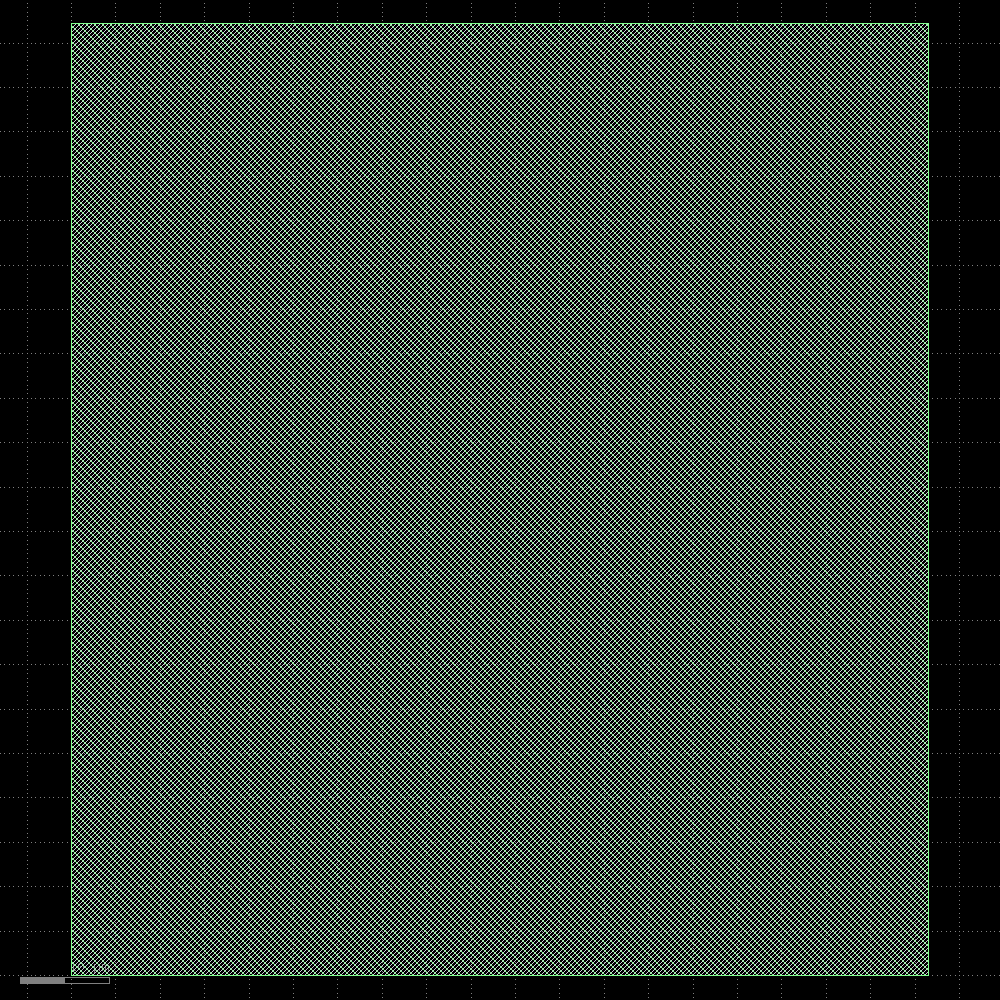

In [11]:
display(floorplan)